#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 07
**CH07 OLS fit simulation**

version 1.0 2021-05-05

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from mizani.formatters import percent_format
import os
from plotnine import *
import numpy as np
import sys
import numpy as np
from datetime import datetime
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani import transforms

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"

# location folders
#data_in = dirname + "da_data_repo/cps-earnings/clear/"
#data_out = dirname + "da_case_studies/ch09-gender-age-earnings/"
output = dirname + "da_case_studies/ch07-ols-simulation/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions 
from py_helper_functions import *

In [4]:
# set the seed
np.random.seed=1458
# sample size
n = 100

In [5]:
# uniformly distributed x, [0,4]
xvar=np.random.uniform(0,4,n)

In [6]:
# y  = a + bx + u (u normally distributed)
a=2
b=0.5
sigmau=0.7
yvar=a+b*xvar+np.random.normal(0,sigmau,size=n)

In [7]:
ols=pd.DataFrame({'yvar':yvar,'xvar':xvar})

In [9]:
reg=smf.ols(formula='yvar~xvar',data=ols).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   yvar   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     60.60
Date:                Sun, 02 May 2021   Prob (F-statistic):           7.28e-12
Time:                        13:13:29   Log-Likelihood:                -106.19
No. Observations:                 100   AIC:                             216.4
Df Residuals:                      98   BIC:                             221.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0274      0.156     13.012      0.000       1.718       2.337
xvar           0.5081      0.065      7.785      0.000       0.379       0.638
==============================================================================
Omnibus:                        1.553   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                1.549
Skew:                          -0.290   Prob(JB):                        0.461
Kurtosis:                       2.812   Cond. No.                         6.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

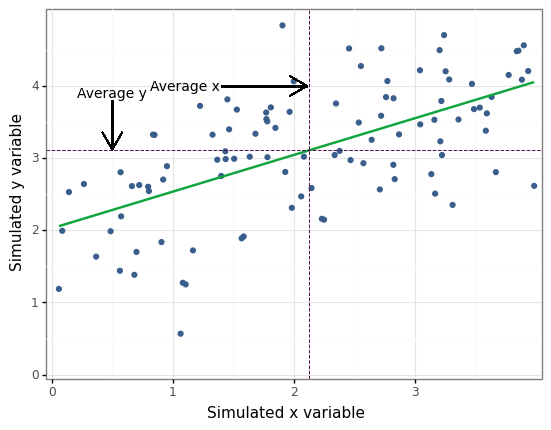

<ggplot: (326677514)>

In [23]:
ggplot(ols, aes(x="xvar", y="yvar")) + geom_point(color=color[0]) + geom_smooth(
    color=color[1], se=False, method="lm"
) + expand_limits(x=0.01, y=0.01) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 4), breaks=seq(0, 4, by=1)
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 5), breaks=seq(0, 5, by=1)
) + labs(
    x="Simulated x variable", y="Simulated y variable"
) + theme_bw() + geom_vline(
    xintercept=np.mean(xvar), color=color[2], linetype="dashed", size=0.4
) + geom_hline(
    yintercept=np.mean(yvar), color=color[2], linetype="dashed", size=0.4
) + geom_segment(
    aes(x=0.5, y=3.8, xend=0.5, yend=3.12), arrow=arrow()
) + annotate(
    "text", x=0.5, y=3.9, label="Average y", size=10
) + geom_segment(
    aes(x=1.4, y=4, xend=2.11, yend=4), arrow=arrow()
) + annotate(
    "text", x=1.1, y=4, label="Average x", size=10
)